In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
import os
import glob
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import glob
from google.colab.patches import cv2_imshow
import cv2
import albumentations as A
import keras
import keras.metrics
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import argmax
from sklearn.metrics import confusion_matrix

In [2]:
normal = []
pneumonia = []
train_path_normal = glob.glob("../../Dataset/chest_xray/chest_xray/train/NORMAL/*.*")
train_path_pneumonia = glob.glob("../../Dataset/chest_xray/chest_xray/train/PNEUMONIA/*.*")
test_path_normal = glob.glob("../../Dataset/chest_xray/chest_xray/test/NORMAL/*.*")
test_path_pneumonia = glob.glob("../../Dataset/chest_xray/chest_xray/test/PNEUMONIA/*.*")
val_path_normal = glob.glob("../../Dataset/chest_xray/chest_xray/val/NORMAL/*.*")
val_path_pneumonia = glob.glob("../../Dataset/chest_xray/chest_xray/val/PNEUMONIA/*.*")
normal.extend(glob.glob("../../Dataset/chest_xray/chest_xray/train/NORMAL/*.*"))
normal.extend(glob.glob("../../Dataset/chest_xray/chest_xray/test/NORMAL/*.*"))
normal.extend(glob.glob("../../Dataset/chest_xray/chest_xray/val/NORMAL/*.*"))
pneumonia.extend(glob.glob("../../Dataset/chest_xray/chest_xray/train/PNEUMONIA/*.*"))
pneumonia.extend(glob.glob("../../Dataset/chest_xray/chest_xray/test/PNEUMONIA/*.*"))
pneumonia.extend(glob.glob("../../Dataset/chest_xray/chest_xray/val/PNEUMONIA/*.*"))
print(len(normal))
print(len(pneumonia))

1583
4273


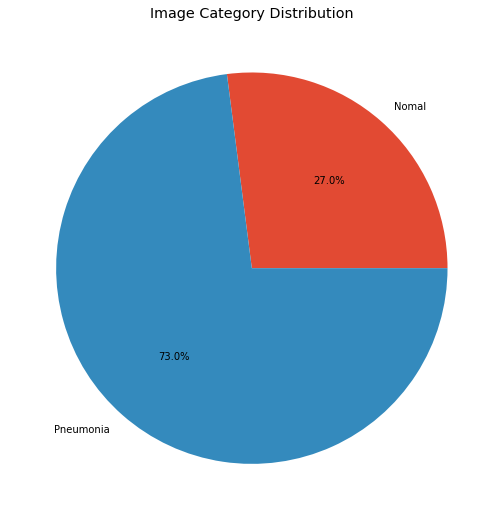

In [10]:
labels = ['Nomal', 'Pneumonia']
targets = [len(normal), len(pneumonia)]
plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
plt.pie(x=targets, labels=labels, autopct="%1.1f%%")
plt.title("Image Category Distribution")
plt.show()

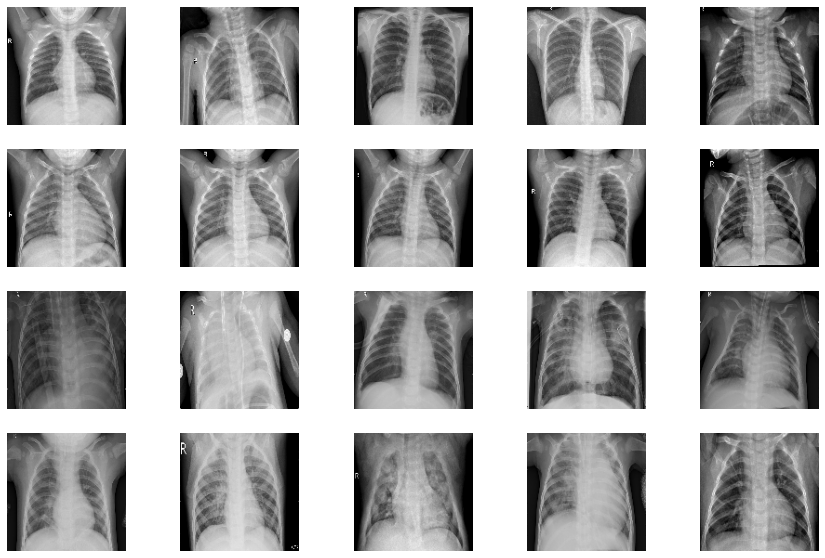

In [3]:
#X-ray images of Normal and Pneumonia patients to see any visible patterns between them
fig = plt.figure(figsize = (15,10))
random.shuffle(normal)
random.shuffle(pneumonia)
mixed = normal[:10] + pneumonia[:10]
i = 0
for file in mixed: 
   i +=1
   img = cv2.imread(file)  
   img = cv2.resize(img,(128,128))
   fig.add_subplot(4,5,i)
   plt.imshow(img)
   plt.axis(False)

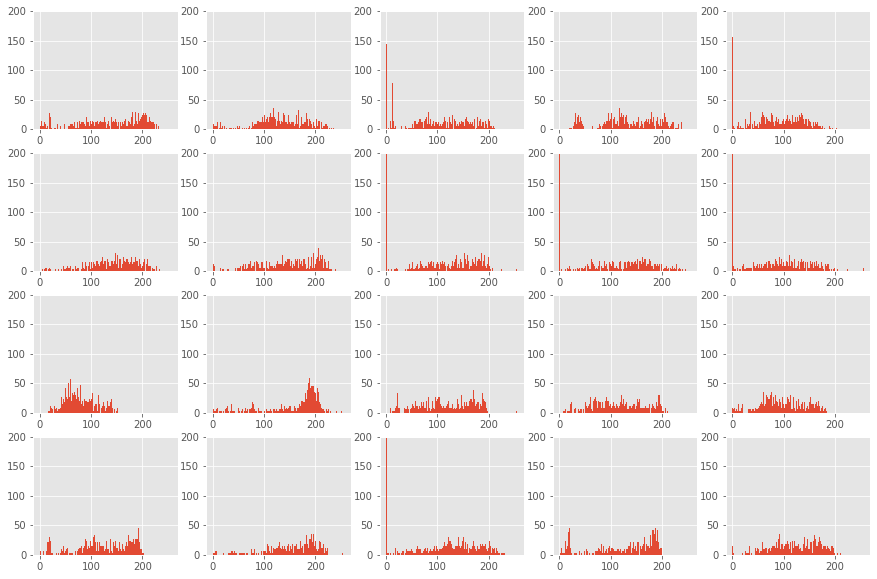

In [12]:
#The grayscale pixel values (0 indicating blackmost pixel and 255 indicating whitemost pixel) against its frequency for both classes for 5 X-ray images for each class individually.
fig = plt.figure(figsize=(15,10))
i = 0
for file in mixed: 
   i +=1
   img = cv2.imread(file) 
   img = cv2.resize(img,(28,28)) 
   fig.add_subplot(4,5,i)
   plt.ylim(0,200)
   plt.hist(img.ravel(),256,[0,256])  
plt.show()

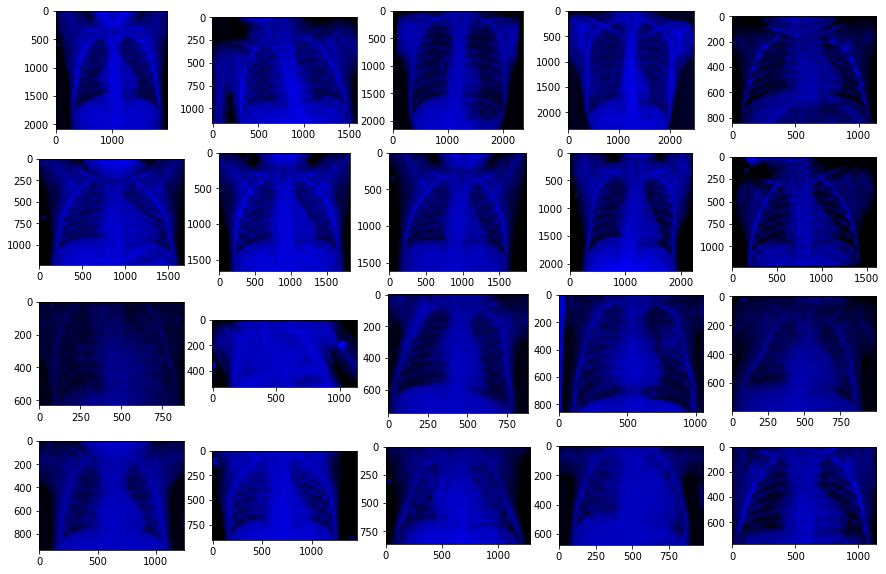

In [5]:
fig = plt.figure(figsize=(15,10))
i = 0
for file in mixed:
  i+=1
  cim = cv2.imread(file)
  img = cv2.resize(img,(28,28)) 
  hsvim = cv2.cvtColor(cim,cv2.COLOR_RGB2HSV)
  huemask1 = ((hsvim >np.array([100,0,0])).astype(np.float32)+(hsvim>np.array([100,0,0])).astype(np.float32)*(-0.5)+0.5)
  mask1_intrd = (huemask1.astype(np.uint8))*255
  fig.add_subplot(4,5,i)
  plt.imshow(hsvim)

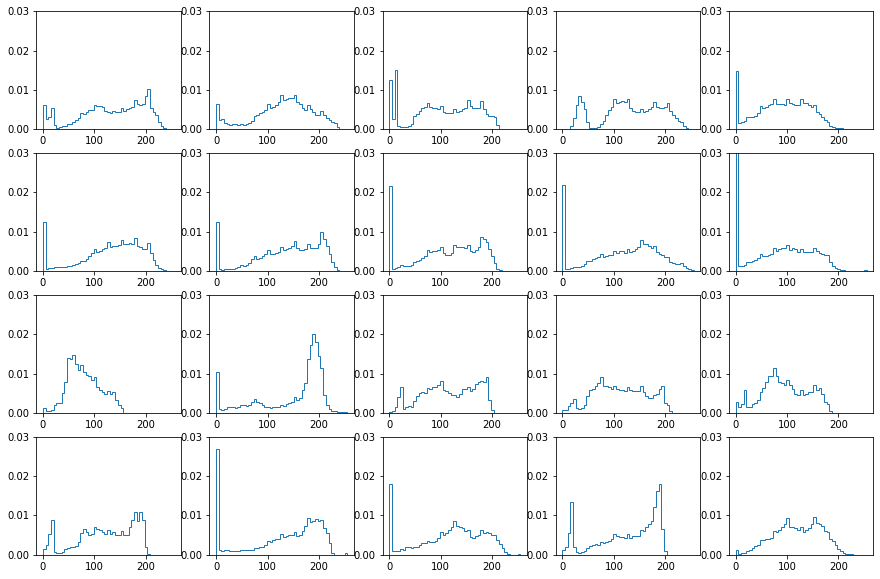

In [6]:
fig = plt.figure(figsize=(15,10))
i = 0
for file in mixed: 
   i +=1
   img = cv2.imread(file)   
   fig.add_subplot(4,5,i)
   plt.ylim(0,0.0300)
   plt.hist(img.ravel(),bins=np.linspace(0, 255, 50), 
                   histtype=u'step', density=True)
plt.show()

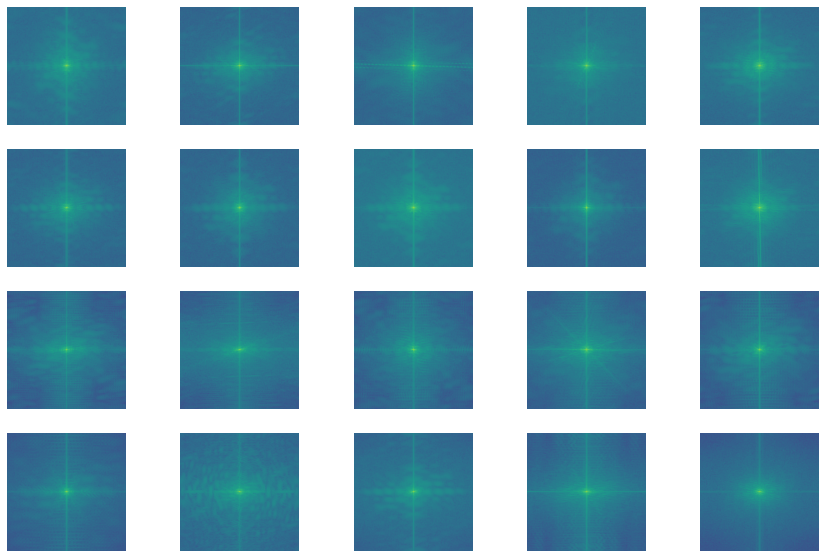

In [7]:
#pixel distributions using the Fourier method
fig=plt.figure(figsize=(15, 10))
i = 0
for file in mixed: 
    i +=1
    img = cv2.imread(file)
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    fig.add_subplot(4, 5, i)
    plt.imshow(magnitude_spectrum)
    plt.axis(False)

In [ ]:
blackp = []
whitep = []
labelp = []
c = 0
path = "../../Dataset/chest_xray/chest_xray/train/PNEUMONIA/*.*"
for file in glob.glob(path): 
   img= cv2.imread(file,0)
   cb = 0
   cw = 0
   for i  in range (len(img)):
     for j in range (len(img[0])):
       if(img[i][j]<20):
         cb += 1
       else:
         cw +=1
   c +=1
   if(c == 100):
     break
   blackp.append(cb)
   whitep.append(cw)
   labelp.append(0)

blackn = []
whiten = []
labeln = []
c = 0
path = "../../Dataset/chest_xray/chest_xray/train/NORMAL/*.*"
for file in glob.glob(path): 
   img= cv2.imread(file,0)
   cb = 0
   cw = 0
   for i  in range (len(img)):
     for j in range (len(img[0])):
       if(img[i][j]<20):
         cb += 1
       else:
         cw +=1
     c +=1
     if(c == 100):
        break
   blackn.append(cb)
   whiten.append(cw)
   labeln.append(1)

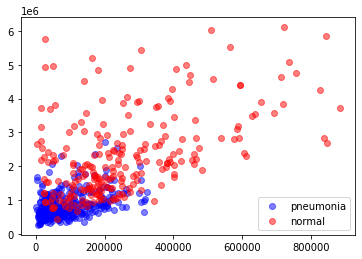

In [ ]:
colors = ['b','r']
a = plt.scatter(blackp, whitep, c=colors[0], alpha=0.5)  
b = plt.scatter(blackn, whiten, c=colors[1], alpha=0.5)
plt.legend((a,b),("pneumonia","normal"))
plt.show()   